# Getting image data into Colab
*Author: Vedrana Andersen Dahl (vand@dtu.dk)*

This notebook shows some ways of loading, retrieving (and visualizing) image data in Colab. Check [Welcome To Colaboratory notebook](https://colab.research.google.com/#scrollTo=gJr_9dXGpJ05) for basic introduction to Colab.

## Loading images from internet

Probably the easiest is to load an image available on the internet, as we show in the following exaples. We load one image from the QIM data repository, and one image from Wikipedia. For very large images this is unpractical, as it takes a long time to load.

We use `urllib.request` to access data from url address, and python image library `PIL` to read the data as an image. If you need a numpy array, you should pass PIL image to `numpy.array`.

In [ ]:
# Load packages.
import PIL
import urllib.request
import matplotlib.pyplot as plt

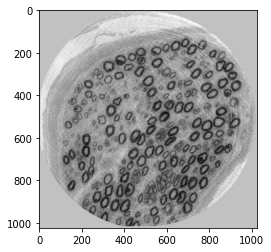

In [ ]:
# Load and visualize an image from QIM data repository.
url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/NT2_0001.png'
I = PIL.Image.open(urllib.request.urlopen(url))
plt.imshow(I, cmap=plt.cm.gray)
plt.show()

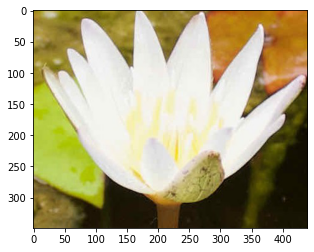

In [ ]:
# Load and visualize an image from Wikipedia.
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Lotus_free.jpg/440px-Lotus_free.jpg'
I = PIL.Image.open(urllib.request.urlopen(url))
plt.imshow(I)
plt.show()

## Loading volumes from internet
Tif volumes may also be loaded from the internet using a similar approach as images. Here we load slices one by one and collect them in a 3D numpy array. However, this is practical only for rather small volumes.

Loading the volume...
Volume shape is: (150, 150, 150)
Volume data type is: uint8
Intensity range is: 25-223


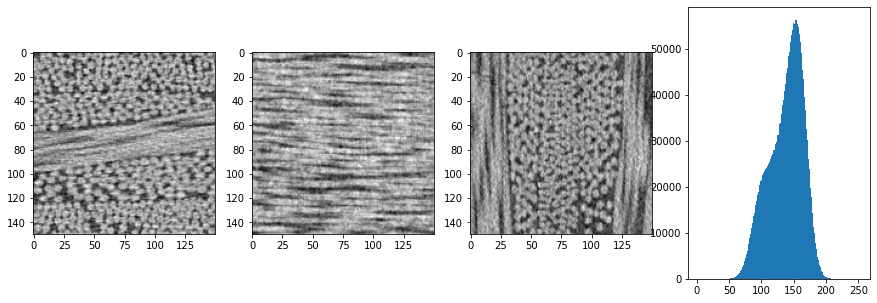

In [ ]:
import numpy as np

# Load and visualize a volume from QIM data repository.
url = 'https://qim.compute.dtu.dk/data-repository/demo_data/multi_cube.tiff'
print('Loading the volume...')

volfile = PIL.Image.open(urllib.request.urlopen(url))

vol = []
for i in range(volfile.n_frames):
    volfile.seek(i)
    vol.append(np.array(volfile))
vol = np.array(vol)

print(f'Volume shape is: {vol.shape}')
print(f'Volume data type is: {vol.dtype}')
print(f'Intensity range is: {vol.min()}-{vol.max()}')

fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(vol[vol.shape[0]//2], cmap=plt.cm.gray)
ax[1].imshow(vol[:, vol.shape[1]//2, :], cmap=plt.cm.gray)
ax[2].imshow(vol[:, :, vol.shape[2]//2], cmap=plt.cm.gray)
ax[3].hist(vol.ravel(), np.arange(257)-0.5)
plt.show()

## Accessing images from your google drive (or your computer)

To access images from your google drive, you need to mount the drive. This is done by folidng out the Files tab of the left side-bar. When the left side-bar is collapsed Files tab has a folder-like icon. Now you can choose to mount the drive, or upload an file to session storage. You can see below how to load the files. However, this will not work for you as it points to a file in *my* drive and a file I uploaded to *my* Colab session.

While only `PIL` works with url, once I have files in my session, I can use another image reader, for example `skimage`. The advantage of skimage is that it directly returns numpy array.

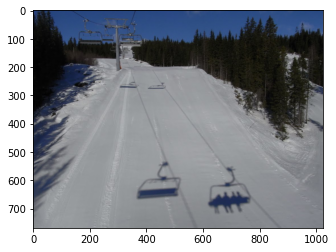

In [ ]:
# Load an image from my google drive.
import skimage.io
image = skimage.io.imread('drive/MyDrive/Photos/Misc/RIMG0003.JPG')
plt.imshow(image)
plt.show()

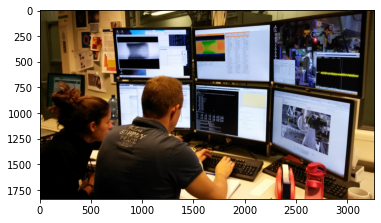

In [ ]:
# Load an image uploaded to Colab session.
image = PIL.Image.open('20171118_203433.jpg')
plt.imshow(image)
plt.show()

## Retreiving images from internet 
Images from internet may also be loaded into your Colab session, instead of loading an image into the notebook runtime as show in first example. The difference is that the image will stay loaded for the whole session, even if you restart the runitme or change between notebooks. Beware that retreiving multiple times will create copies, so try doing it only once.

As with other images available in the session, here I may use different loaders. I choose `tifffile` for tiff volume.

In [ ]:
# Retrieve volume from QIM data repository.
!wget 'https://qim.compute.dtu.dk/data-repository/InSegt_data/3D/nerves_part.tiff' -q

Volume shape is: (1024, 350, 350)
Volume data type is: uint8
Intensity range is: 0-236


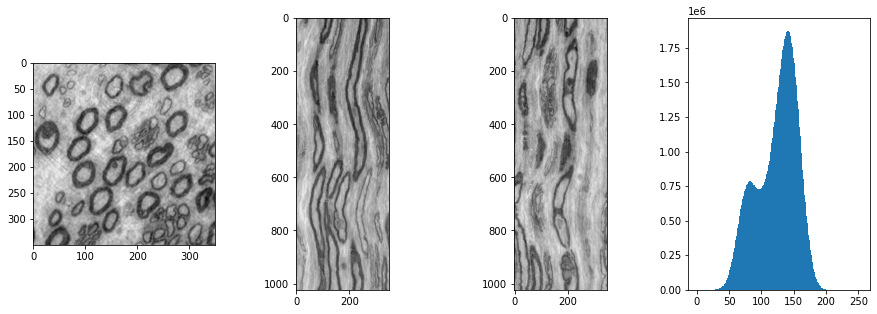

In [ ]:
# Load volume using tiffile.
import tifffile
vol = tifffile.imread('nerves_part.tiff')

print(f'Volume shape is: {vol.shape}')
print(f'Volume data type is: {vol.dtype}')
print(f'Intensity range is: {vol.min()}-{vol.max()}')

# Visualize volume slices and histogram
fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(vol[vol.shape[0]//2], cmap=plt.cm.gray)
ax[1].imshow(vol[:, vol.shape[1]//2, :], cmap=plt.cm.gray)
ax[2].imshow(vol[:, :, vol.shape[2]//2], cmap=plt.cm.gray)
ax[3].hist(vol.ravel(), np.arange(257)-0.5)
plt.show()

## Another example, retrieve dataset from dropbox

In [ ]:
# Retreive MedNIST data set from dropbox.
!wget -q https://www.dropbox.com/s/5wwskxctvcxiuea/MedNIST.tar.gz

In [ ]:
# Unzip the '.tar.gz' file to the current directory
import tarfile
datafile = tarfile.open('MedNIST.tar.gz')
datafile.extractall()
datafile.close()

In [ ]:
# Get the subfolders of the data folder
import glob
folders = glob.glob('MedNIST/*/')
print(folders)

['MedNIST/Hand/', 'MedNIST/ChestCT/', 'MedNIST/AbdomenCT/', 'MedNIST/HeadCT/', 'MedNIST/BreastMRI/', 'MedNIST/CXR/']


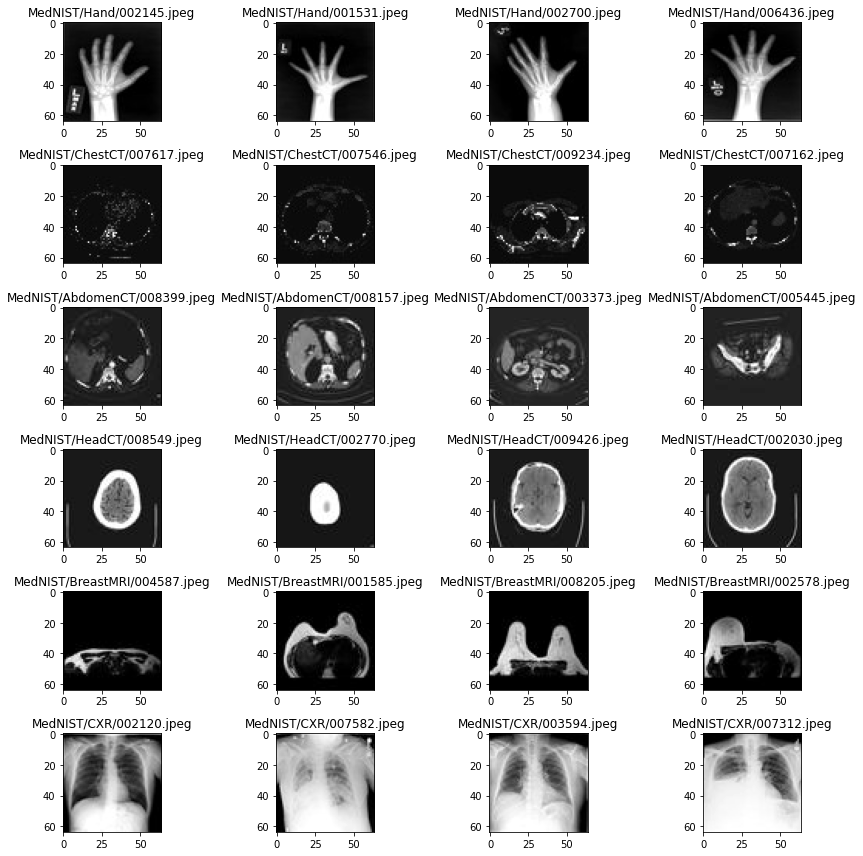

In [ ]:
# Visualize 4 random images from each folder 
fig, ax = plt.subplots(len(folders), 4, figsize=(12, 12))
for i, f in enumerate(folders):
  image_files = glob.glob(f + '/*.jpeg')
  rand_idx = np.random.choice(len(image_files), size=4, replace=False)
  for j, r in enumerate(rand_idx):
    ax[i, j].imshow(PIL.Image.open(image_files[r]), cmap=plt.cm.gray)
    ax[i, j].set_title(image_files[r])
plt.tight_layout()
plt.show()